<a href="https://colab.research.google.com/github/Youjin14/data310/blob/master/TF_Text_Classification_with_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

In [3]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3WSVYQ/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3WSVYQ/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3WSVYQ/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
encoder = info.features['text'].encoder

In [5]:
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [6]:
sample_string = 'Hello TensorFlow.'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: "{}"'.format(original_string))

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
The original string: "Hello TensorFlow."


In [7]:
assert original_string == sample_string

In [8]:
for index in encoded_string:
  print('{} ----> {}'.format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
4043 ----> Fl
2120 ----> ow
7975 ----> .


In [9]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [10]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE)

test_dataset = test_dataset.padded_batch(BATCH_SIZE)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [13]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [14]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset, 
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 44s 113ms/step - loss: 0.6097 - accuracy: 0.6094 - val_loss: 0.4176 - val_accuracy: 0.8120
Epoch 2/10
391/391 [==============================] - 44s 112ms/step - loss: 0.3367 - accuracy: 0.8616 - val_loss: 0.3432 - val_accuracy: 0.8568
Epoch 3/10
391/391 [==============================] - 44s 113ms/step - loss: 0.2571 - accuracy: 0.9021 - val_loss: 0.3481 - val_accuracy: 0.8578
Epoch 4/10
391/391 [==============================] - 44s 114ms/step - loss: 0.2160 - accuracy: 0.9211 - val_loss: 0.3391 - val_accuracy: 0.8687
Epoch 5/10
391/391 [==============================] - 44s 114ms/step - loss: 0.2042 - accuracy: 0.9262 - val_loss: 0.3437 - val_accuracy: 0.8646
Epoch 6/10
391/391 [==============================] - 45s 115ms/step - loss: 0.1701 - accuracy: 0.9409 - val_loss: 0.3581 - val_accuracy: 0.8661
Epoch 7/10
391/391 [==============================] - 45s 114ms/step - loss: 0.1519 - accuracy: 0.9497 - val_loss: 0.3866 - val_ac

In [15]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 22s 56ms/step - loss: 0.4485 - accuracy: 0.8610
Test Loss: 0.448454886674881
Test Accuracy: 0.8610399961471558


In [16]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [17]:
def sample_predict(sample_pred_text, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)

  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))

  return (predictions)

In [18]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[-0.11917268]]


In [19]:
# predict on a sample text with padding

sample_pred_text = ('The movie was cool. The animation and the graphics '
                    'were out of this world. I would recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)

[[-0.33051682]]


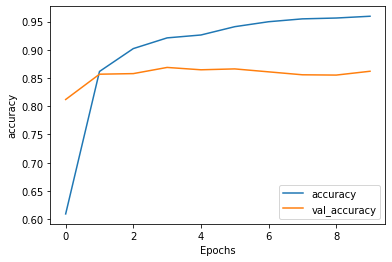

In [20]:
plot_graphs(history, 'accuracy')

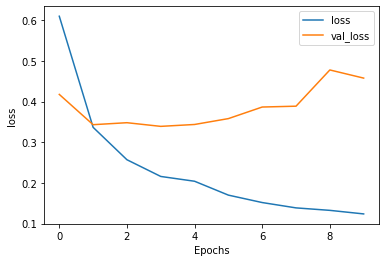

In [21]:
plot_graphs(history, 'loss')

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [23]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [24]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 82s 209ms/step - loss: 0.6879 - accuracy: 0.5034 - val_loss: 0.5896 - val_accuracy: 0.6901
Epoch 2/10
391/391 [==============================] - 80s 205ms/step - loss: 0.4291 - accuracy: 0.8055 - val_loss: 0.3772 - val_accuracy: 0.8271
Epoch 3/10
391/391 [==============================] - 79s 203ms/step - loss: 0.2894 - accuracy: 0.8890 - val_loss: 0.3643 - val_accuracy: 0.8552
Epoch 4/10
391/391 [==============================] - 79s 203ms/step - loss: 0.2320 - accuracy: 0.9163 - val_loss: 0.3483 - val_accuracy: 0.8609
Epoch 5/10
391/391 [==============================] - 80s 203ms/step - loss: 0.1910 - accuracy: 0.9364 - val_loss: 0.3733 - val_accuracy: 0.8526
Epoch 6/10
391/391 [==============================] - 80s 205ms/step - loss: 0.1629 - accuracy: 0.9473 - val_loss: 0.3949 - val_accuracy: 0.8526
Epoch 7/10
391/391 [==============================] - 81s 206ms/step - loss: 0.1406 - accuracy: 0.9581 - val_loss: 0.4377 - val_ac

In [25]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

391/391 [==============================] - 39s 99ms/step - loss: 0.5321 - accuracy: 0.8490
Test Loss: 0.5320723056793213
Test Accuracy: 0.8490399718284607


In [26]:
# predict on a sample text without padding.

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=False)
print(predictions)

[[-2.752427]]


In [27]:
# predict on a sample text with padding

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predict(sample_pred_text, pad=True)
print(predictions)

[[-2.8144548]]


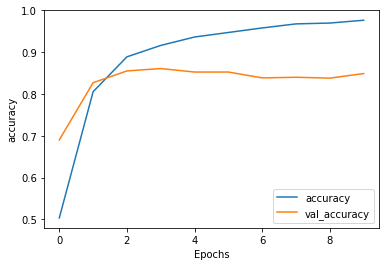

In [28]:
plot_graphs(history, 'accuracy')

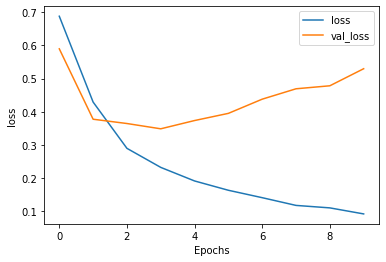

In [29]:
plot_graphs(history, 'loss')